# Topological Data Analysis with Persistent Homology, $0^\text{th}$ tutorial
https://raphaeltinarrage.github.io/EMAp.html
## Required libraries
Last update: 16/01/2021

Before the first tutorial, please make sure to install the last version of the following libraries.
You should be able to compile this notebook and obtain similar results.

In [1]:
import gudhi 
import numpy as np
import networkx as nx
import itertools
import random

In [2]:
# numpy

X = np.random.normal(0, 1,  (3, 50)).T
print(X)

[[ 0.23322612  1.15345974 -0.24060339]
 [-2.23357392 -0.25959638  0.63317876]
 [-1.40968503 -0.81633414  0.90729651]
 [-0.32722284 -0.50339989 -0.01714084]
 [ 2.30468951 -1.16605519 -1.20601354]
 [ 1.44321948  0.0600701  -0.1929111 ]
 [-1.14875984  2.42283093  0.28459033]
 [ 1.08881057 -1.49249823  1.03296727]
 [ 0.64399441  1.37173356 -0.0055363 ]
 [ 1.69982765  0.18048474  0.12629492]
 [-1.44231229 -0.70567151  1.10583354]
 [ 0.43017359 -0.40550925  0.51641881]
 [-0.5043454  -1.04778854 -0.12583444]
 [-0.06875316 -1.7577414   1.39346571]
 [ 0.08732008  0.19280697 -0.17924111]
 [ 1.13849535  0.17079703 -0.59629637]
 [ 1.91173543 -1.12767751 -0.20222896]
 [-0.31627456 -0.47563983  0.80846616]
 [ 1.62888031 -0.60765651 -0.43992943]
 [-2.65431824  1.622302   -1.53281083]
 [ 0.51596735  0.21507848 -0.44355811]
 [ 1.88570438 -0.69010059 -0.21757563]
 [ 0.58381618 -1.48673416 -2.87965792]
 [ 1.63508127  1.55810826 -0.06824631]
 [-0.3785759  -0.29994975 -1.9468419 ]
 [ 1.39974688 -0.24540344

/home/andrew/miniconda3/envs/tda/lib/python3.12/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence barcode'}>

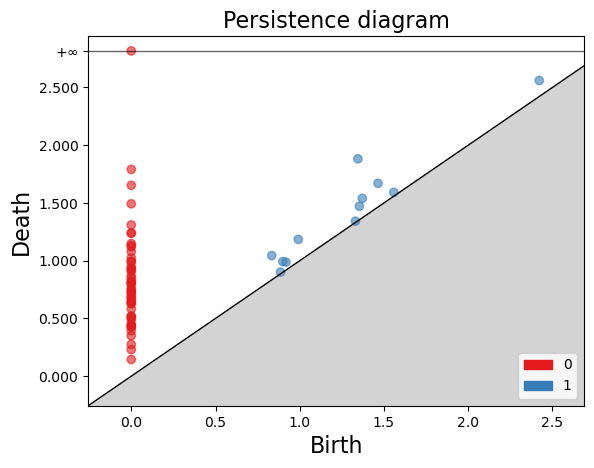

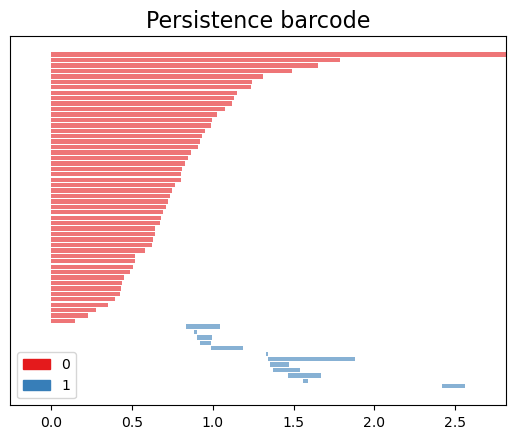

In [3]:
#gudhi

rips = gudhi.RipsComplex(points = X)
st = rips.create_simplex_tree(max_dimension=2)
st.compute_persistence()

gudhi.plot_persistence_diagram(st.persistence())
gudhi.plot_persistence_barcode(st.persistence())

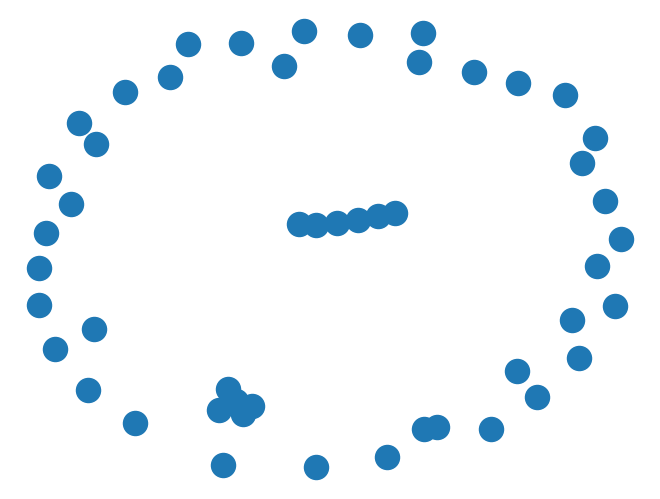

In [4]:
# networkx

nodes=[]; edges=[]
st.prune_above_filtration(0.5)
for filtr in st.get_skeleton(1):
    simplex = filtr[0]
    if len(simplex)==1:
        nodes.append(simplex[0])
    if len(simplex)==2:
        edges.append(simplex)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G)